### Import statements

In [2]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import torch
import torch.nn as nn
warnings.filterwarnings("ignore")

### NOTE:
 If you are working in python virtual environment and You need to install some missed packages through jupyter notebook use below command to install by replacing it name of required package.

In [2]:
# !{sys.executable} -m pip install "Install module"
!{sys.executable} -m pip install tqdm

# 1. Data Ingestion:
Dataset: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
We have two options for getting the data
### 1.1. Downloading dataset directly from kaggle through jupyter notebook
            1. opendatasets: A Python library for downloading datasets from Kaggle, Google Drive, and other online sources.
                  cons:Now it's not actively maintained. (https://github.com/JovianHQ/opendatasets)
            
            2. Kaggle API
                 cons: The download process might be limited by the capabilities of the Kaggle API within the notebook environment.
### 1.2. Downloading dataset through browser
            1.  After login into kaggle account, go to the above dataset link.click the download button.             
            2. Copy and paste the downloaded dataset into project directory

In [3]:
dataset_path = "IMDB Dataset.csv"

if not os.path.exists(dataset_path):
    print("Dataset not exists, Downloading from kaggale ...")
    try:
        try:
            import opendatasets as od
        except ImportError:
            !{sys.executable} -m pip install opendatasets 
        
        import opendatasets as od
        dataset = od.download("https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")
        print("Dataset downloaded successfully!")
        df  = pd.read_csv('imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
    except Exception as e:
        print(f"Error downloading dataset: {e}")
else:
    df = pd.read_csv(dataset_path)

# 2. Exploratery data analysis

### 2.1. Exploring the  dataset and derive important information from it

***What type of data present in the dataset ?***

In [4]:
df.dtypes

review       object
sentiment    object
dtype: object

Both are object datatype and needs some pre-processing.

***How the dataset looks like, what are the features and target variables present in the dataset ?***

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Explanation**: We can conclude that our independent variable or feature (X) is `review` and  label or target variable is `sentiment` and the given dataset is labelled so it's Supervised Sentiment Analysis problem.

**Things I noticed** : In review 2, there is an HTML tag for break line. <br/><br> 

***Whether this dataset contains any null values ?***

In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

**Explanation**: There is no null values so we don't want to perform dropping null values or imputation on the dataset.

***How will dataset's distribution looks in statiscal way ?***

In [7]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


**Explanation**:
1. Count - Total number of entries = 50000 reviews and 50000 sentiments
2. unique - Total number of unqiue entries = 49582 reviews and 2 sentiments (positive/negative)
1. top - The top is the most common value.  =  "Loved today's show!!! It was a variety and.."
2. freq - The freq is the most common value’s frequency. = 5 times its appears in csv file

***Whether the dataset has class Imbalance?***

In [8]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

**Explanation**: Since our balanced dataset, we can focus on exploring the characteristics of the reviews and sentiment labels to gain insights for your sentiment analysis task

***How was the distribution of review lengths ?***
<br>
***Why do I need to know about distribution of review length ?***

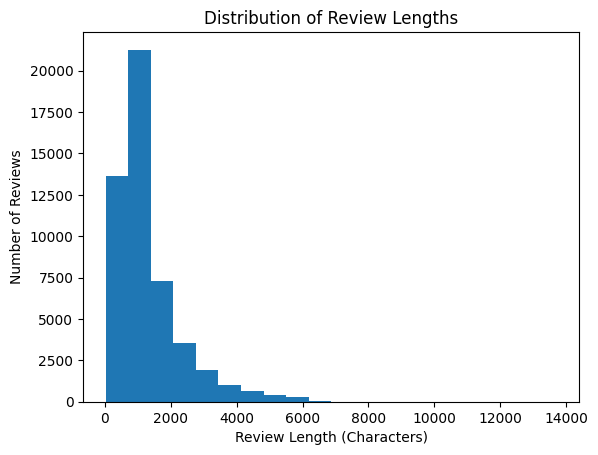

In [9]:
review_lengths = df['review'].str.len()
review_lengths.plot.hist(bins=20)
plt.xlabel("Review Length (Characters)")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Review Lengths")
plt.show()

***Explanation***: 
 1. To understand user Behavior: 
       A peak at a lower length might suggest users tend to summarize key points, while a peak at a higher length could indicate more elaborate reviews.
 2. Potential Biases:
 Short reviews might lack nuance, while very long reviews could be more rambling and difficult for sentiment models to interpret accurately.

Positive Review Words:0        307
1        162
2        166
4        230
5        119
        ... 
49983    133
49985    216
49989    173
49992    170
49995    194
Name: review, Length: 25000, dtype: int64
Negative Review Words:3        138
7        174
8        130
10        96
11       180
        ... 
49994    134
49996    112
49997    230
49998    212
49999    129
Name: review, Length: 25000, dtype: int64


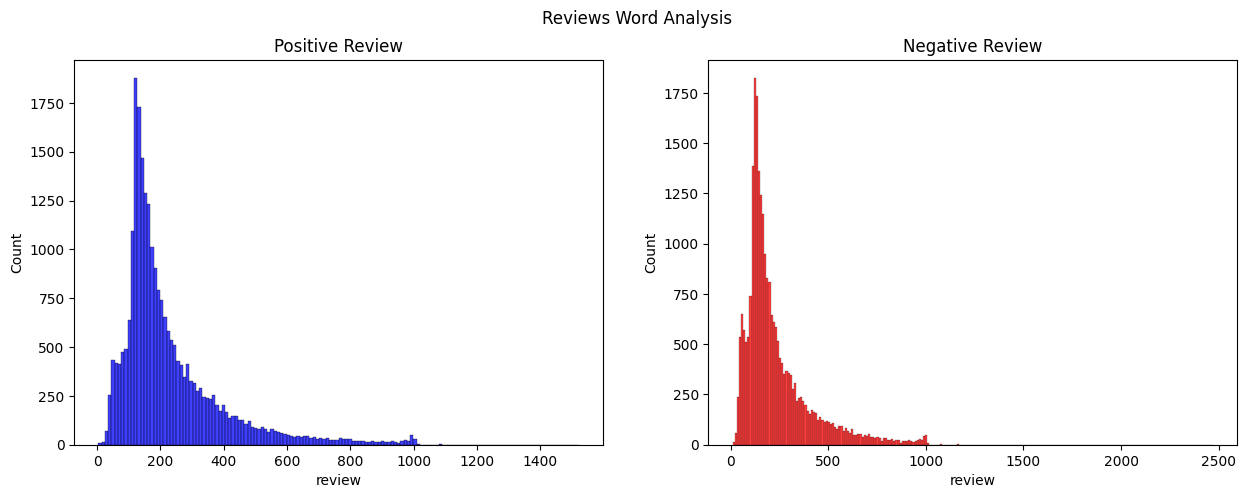

In [10]:
def calculate_length(data): ## length calculation function
    return len(data)

def plot_count(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.histplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.histplot(count_ones,ax=ax2,color='Red')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    


good_review=df[df['sentiment']=='positive']
bad_review=df[df['sentiment']=='negative']

no_good_words=good_review['review'].str.split().apply(lambda z:calculate_length(z))
no_bad_words=bad_review['review'].str.split().apply(lambda z:calculate_length(z))
print("Positive Review Words:" + str(no_good_words))
print("Negative Review Words:" + str(no_bad_words))
plot_count(no_good_words,no_bad_words,"Positive Review","Negative Review","Reviews Word Analysis")

**Interpretation** : Review in range of 100 to 200 has maximum word count in both positive and negative review. This tends to have balance of positive and negative reviews word count in the dataset.


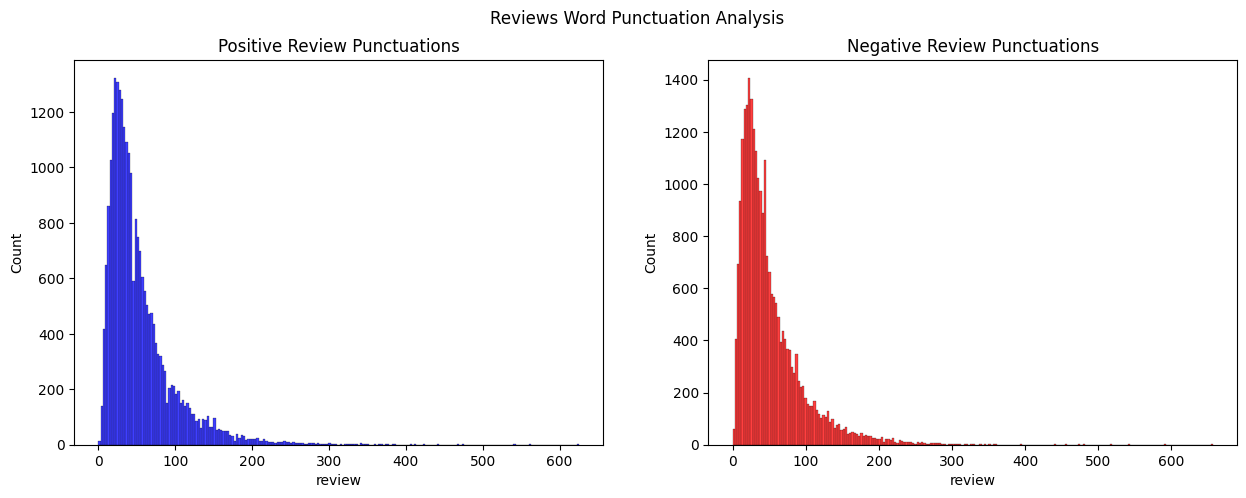

In [11]:
import string
count_good_punctuations=good_review['review'].apply(lambda z: len([c for c in str(z) if c in string.punctuation]))
count_bad_punctuations=bad_review['review'].apply(lambda z:len([c for c in str(z) if c in string.punctuation]))
plot_count(count_good_punctuations,count_bad_punctuations,"Positive Review Punctuations","Negative Review Punctuations","Reviews Word Punctuation Analysis")

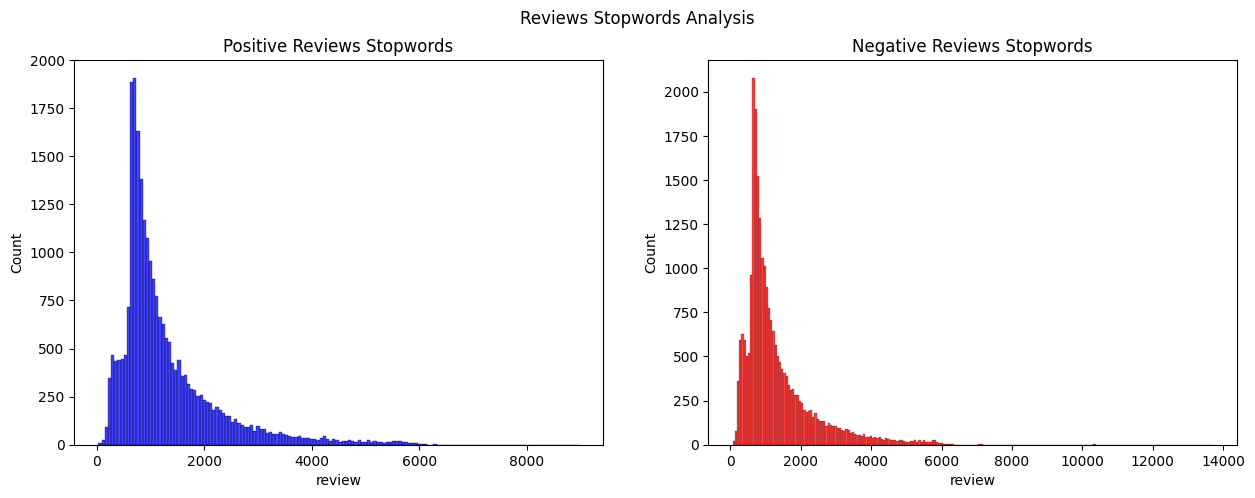

In [12]:
import nltk
from nltk.corpus import stopwords
import numpy as np
stop_words = stopwords.words('english')

count_good_stops=good_review['review'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
count_bad_stops=bad_review['review'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
plot_count(count_good_stops,count_bad_stops,"Positive Reviews Stopwords","Negative Reviews Stopwords","Reviews Stopwords Analysis")

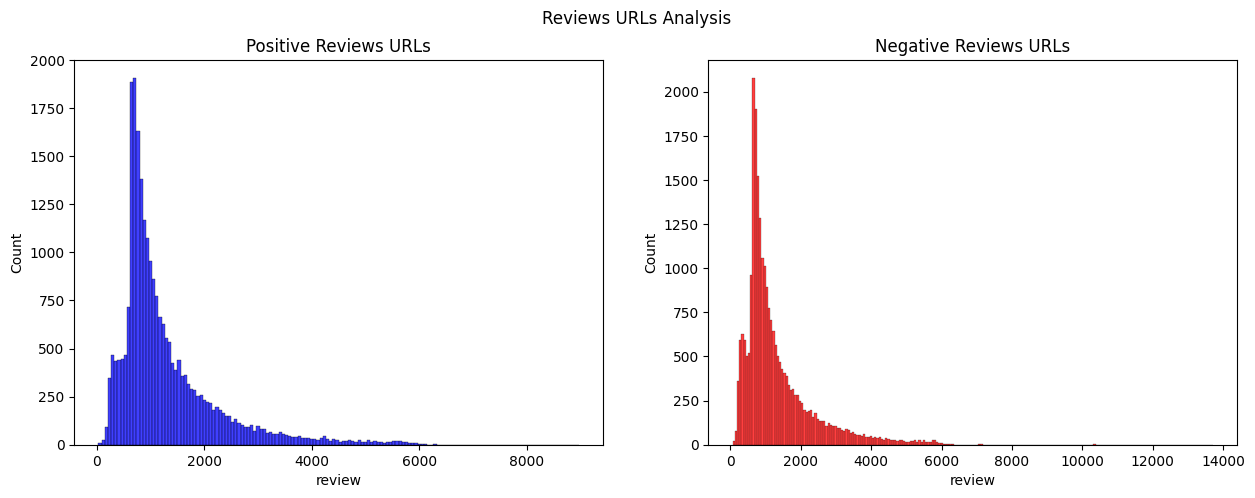

In [13]:
count_good_urls=good_review['review'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
count_bad_urls=bad_review['review'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

plot_count(count_good_stops,count_bad_stops,"Positive Reviews URLs","Negative Reviews URLs","Reviews URLs Analysis")

***Explanation***: 
Punctuation, URLs and stopwords have equal distribution in both positive and negative review.

<Axes: >

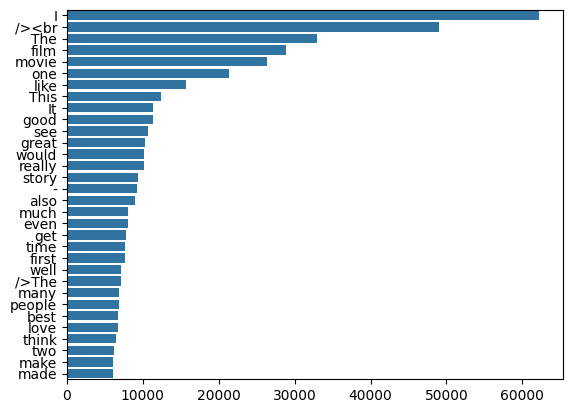

In [14]:
from collections import Counter

stops=set(stopwords.words('english'))
def create_corpus(word):
    corpus=[]

    for x in df[df['sentiment']==word]['review'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

corpus=create_corpus('positive')
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:100]:
    if (word not in stops) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

***Whether this dataset contains emoji or not ?***

In [15]:
# Install the emoji library if you don't have it: !{sys.executable} -m pip install emoji
import emoji

def has_emoji(text):
  return emoji.demojize(text) != text  # Demojize removes emoji formatting, indicating emoji presence

has_emoji(df['review'])

0        True
1        True
2        True
3        True
4        True
         ... 
49995    True
49996    True
49997    True
49998    True
49999    True
Name: review, Length: 50000, dtype: bool

***Inference***:
The dataset contains
   1. Equal number of semantics for reviews of both polarity.
   2. Unnecessary words and html syntax
   3. Punctuations/stopwords are present in a equal distribution.
   4. Emoji

***Whether my dataset contains abbreivated/chat words?***

In [16]:
import re

chat_regex = r"\b(gr8|lol|omg|brb|btw)\b"  # common chat words to check whether it's present or not.
abbreviation_regex = r"\b([A-Z][\.]){2,}"  # Pattern for abbreviations with uppercase letters and periods

num_chat_matches = 0
num_abbreviation_matches = 0
for review in df['review']:
  num_chat_matches += len(re.findall(chat_regex, review))
  num_abbreviation_matches += len(re.findall(abbreviation_regex, review))

print(f"Number of chat word matches: {num_chat_matches}")
print(f"Number of abbreviation matches: {num_abbreviation_matches}")

Number of chat word matches: 180
Number of abbreviation matches: 2468


### 2.2. Data Preprocessing

***Things we have noticed on data analysis are html syntax, URLs, Stopwords Punctuations, emojis and chat words so we got to know what we need to clean.***

In [17]:
import re
df['review'] = df['review'].str.lower() # Upper to lowercase.
def remove_punctuations(data):
    """
    Removes punctuations
    """
    punct_tag=re.compile(r'[^\w\s]') # ^- negate - (\w  alphanumeric, \s  whitespace)
    data=punct_tag.sub(r'',data) #substiution operation.
    return data


def remove_html(data):
    """
    Removes HTML syntaxes
    """
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data


def remove_url(data):
    """
    Removes URL data
    """
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

def remove_emoji(data):
    """
    Removes Emojis
    """
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    return data

df['review']=df['review'].apply(lambda z: remove_punctuations(z))
df['review']=df['review'].apply(lambda z: remove_html(z))
df['review']=df['review'].apply(lambda z: remove_url(z))
df['review']=df['review'].apply(lambda z: remove_emoji(z))

In [18]:
# https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt - OMG is not present in original but I have added here.
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing",
    "OMG": "oh my god"
}

def chat_conversation(text):
    """
    Converting chat to conversation
    """
    new_text = []
    for i in text.split():
        if i.upper() in chat_words:
            new_text.append(chat_words[i.upper()])
        else:
            new_text.append(i)
    return " ".join(new_text)

# Calling Function 
df['review'] = df['review'].apply(chat_conversation)

# Head
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend Te...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the Tears in my eyes of...,positive


Text are variable length sequence data with semantic relationship between words so  we need to capture semantic relationship and convert variable length sequence into fixed length.

***How to capture the sentiment and review relationship for better model performance ?***

Explanation: Words like wonderful - sometimes  positive sentiment, but if I look at in sentence context "This movie is not wonderful" - negative sentiment. so we will use both word and sentence relationship for sentiment classifier.

     1. Tokenization of  words and sentence  - analyze sentiment at the word level and analyze sentiment at the sentence level respectively.


In [19]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

def tokenization(df):
    """
    Applying word level and sentence level tokenization
    """
    df['review_word_token'] = df['review'].apply(word_tokenize)
    df['review_sent_token'] = df['review'].apply(sent_tokenize)
    return df

df = tokenization(df)
df.head()

,review,sentiment,review_word_token,review_sent_token
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione...",[one of the other reviewers has mentioned that...
1,a wonderful little production br br the filmin...,positive,"[a, wonderful, little, production, br, br, the...",[a wonderful little production br br the filmi...
2,i thought this was a wonderful way to spend Te...,positive,"[i, thought, this, was, a, wonderful, way, to,...",[i thought this was a wonderful way to spend T...
3,basically theres a family where a little boy j...,negative,"[basically, theres, a, family, where, a, littl...",[basically theres a family where a little boy ...
4,petter matteis love in the Tears in my eyes of...,positive,"[petter, matteis, love, in, the, Tears, in, my...",[petter matteis love in the Tears in my eyes o...




We know some reviews are very lengthy, some are average length. but reviews contains only few unique words that gives meaning to the sentence. In other words, sentences are formed by combination of unique words. 
E.G Words like Walking, walked has base form "walk"

Problems can be faced after Tokenization: Common problems include handling prefixes, suffixes, and special characters.
Algorithms may struggle with understanding certain characters and word structures so to solve this problem these Two techniques like Stemming and Lemmatization can be used.
I prefer Lemmatization: It preserves actual meaning of the word by considering its grammatical role in the sentence and considers the context, part-of-speech of a word which is crucial for accurate sentiment analysis.

***Lemmatization***

In [20]:
from nltk.stem import WordNetLemmatizer


def lemma_traincorpus(data):
    lemmatizer=WordNetLemmatizer()
    out_data=""
    for words in data:
        out_data+= lemmatizer.lemmatize(words)
    return out_data

df['review_lemm']=df['review'].apply(lambda z: lemma_traincorpus(z))

***Converting positive and negative  to 1 and 0***

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

In [22]:
df.columns

Index(['review', 'sentiment', 'review_word_token', 'review_sent_token',
       'review_lemm'],
      dtype='object')

# 2. Dataset splitting
We will split the dataset into
 1. Training set   - This will help model to learn relationship and patterns present in dataset. - 70%
 2. Validation set - This will be useful for model selection - 20%
 3. Testing set    - This will help us to know whether our model learn and generalizes properly or memorize the dataset (Overfitting)- 10%


In [23]:
from sklearn.model_selection import train_test_split

# Define the split ratios
train_size = 0.7  # 70% for training data
val_size = 0.2  # 20% for validation data
test_size = 0.1  # 10% for testing data

train_val, test_data = train_test_split(df, test_size=test_size, random_state=42)
train_data, val_data = train_test_split(train_val, test_size=val_size/(val_size+train_size), random_state=42)

# 2. Feature Engineering and  Model Creation
It involves creating features that represent the sentiment of the text.

We can reuse whenever we need it.

In [24]:
train_data['sentiment'].value_counts()

sentiment
0    17546
1    17453
Name: count, dtype: int64

***Inference***: After splitting the dataset, Class Imbalance occurs so to mitigate this problem I have choose oversampling technique.

In [25]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  # Example of additional model (SVM)
from sklearn.ensemble import GradientBoostingClassifier  # Example of additional model (Gradient Boosting)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


def train_model(train_data, model_type="LogisticRegression", model_params={}):
  """
  Trains a machine learning model for sentiment analysis using a pipeline that includes text pre-processing and oversampling for imbalanced data.
  """

  pipeline = ImbPipeline([
      ('vect', CountVectorizer()),
      ('tfidf', TfidfTransformer()),
      ('smote', SMOTE(random_state=42)),
  ])

  # Model selection and hyperparameter assignment (no GridSearchCV)
  if model_type == "LogisticRegression":
      selected_model = LogisticRegression(**model_params)
  elif model_type == "LinearSVC":
      selected_model = LinearSVC(**model_params)
  elif model_type == "SGDClassifier":
      selected_model = SGDClassifier(**model_params)
  elif model_type == "XGBoost":
      selected_model = XGBClassifier(**model_params)
  else:
      raise ValueError(f"Unsupported model type: {model_type}")

  pipeline.steps.append(("model", selected_model))

  # Train the model
  pipeline.fit(train_data['review_lemm'], train_data['sentiment'])

  # Return the trained pipeline
  return pipeline
    

def evaluate_model(model, train_data, val_data,test_data):
  """
  Evaluates a trained model on both training and validation datasets.

  """

  # Evaluate on training dataset
  train_predictions = model.predict(train_data['review'])
  train_accuracy = accuracy_score(train_data['sentiment'], train_predictions)
  train_precision = precision_score(train_data['sentiment'], train_predictions)
  train_recall = recall_score(train_data['sentiment'], train_predictions)
  train_f1 = f1_score(train_data['sentiment'], train_predictions)

  # Evaluate on validation dataset
  val_data_predictions = model.predict(val_data['review'])
  val_accuracy = accuracy_score(val_data['sentiment'], val_data_predictions)
  val_precision = precision_score(val_data['sentiment'], val_data_predictions)
  val_recall = recall_score(val_data['sentiment'], val_data_predictions)
  val_f1 = f1_score(val_data['sentiment'],val_data_predictions)

  # Evaluate on test dataset
  test_data_predictions = model.predict(test_data['review'])
  test_accuracy = accuracy_score(test_data['sentiment'], test_data_predictions)
  test_precision = precision_score(test_data['sentiment'], test_data_predictions)
  test_recall = recall_score(test_data['sentiment'], test_data_predictions)
  test_f1 = f1_score(test_data['sentiment'],test_data_predictions)

  # Display metrics
  results = {
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
        'Training': [train_accuracy, train_precision, train_recall, train_f1],
        'Validation': [val_accuracy, val_precision, val_recall, val_f1],
         'Testing': [test_accuracy, test_precision, test_recall, test_f1]
    }
  df_metrics = pd.DataFrame(results).set_index('Metric')
    

  res_metrics = pd.DataFrame(results)
  return res_metrics 


# 3. Model Training and Model Selection


***1. Logistic Regression***

In [26]:
logistic_model = train_model(train_data, model_type="LogisticRegression")
logistic_performance = evaluate_model(logistic_model, train_data, val_data,test_data)

***2.Linear SVC***

In [27]:
from sklearn.svm import LinearSVC
linear_svc_model = train_model(train_data, model_type="LinearSVC")
lsvc_performance = evaluate_model(linear_svc_model, train_data, val_data,test_data)

***3.SGD Classifier***

In [28]:
from sklearn.linear_model import  SGDClassifier
sgd_model = train_model(train_data, model_type="SGDClassifier", model_params={"loss": "hinge", "penalty": "l2"})
sgd_performance = evaluate_model(sgd_model, train_data, val_data,test_data)

***4.XGBoost***

In [29]:
from xgboost import XGBClassifier
XGB_model = train_model(train_data, model_type="XGBoost",model_params={'objective':'binary:logistic', 'random_state':42})
xgb_performance = evaluate_model(XGB_model, train_data, val_data,test_data)

In [30]:
from IPython.display import HTML
# Create HTML with titles and tables
html_str = """
<div style="display: flex;">
  <div style="flex: 0 0 20%;">
    <h2>Logistic Regression</h2>
    """ + logistic_performance.to_html(index=False) + """
  </div>
    <div style="flex: 0 0 20%;">
    <h2>SGD Classifier</h2>
    """ + sgd_performance.to_html(index=False) + """
  </div>
  <div style="flex: 0 0 20%;">
    <h2>Linear SVC</h2>
    """ + lsvc_performance.to_html(index=False) + """
  </div>
  <div style="flex: 0 0 20%;">
    <h2>XGBoost</h2>
    """ + xgb_performance.to_html(index=False) + """
  </div>
</div>
"""

display(HTML(html_str))

Metric,Training,Validation,Testing
Accuracy,0.931769,0.897910,0.894600
Precision,0.926119,0.887599,0.883667
Recall,0.938005,0.912490,0.910679
F1-Score,0.932024,0.899873,0.896970
Metric,Training,Validation,Testing
Accuracy,0.929427,0.898210,0.895600
Precision,0.920894,0.884100,0.883301
Recall,0.939151,0.917860,0.913458
F1-Score,0.929933,0.900664,0.898126
Metric,Training,Validation,Testing


***Inference***:
1. Linear SVC and XGBoost faces overfitting i.e Large gap between training and validation performance.
2. Logistic Regression and SGD Classifier faces slight overfitting. i.e There's a small gap between the training and validation performance. This suggests a potential for slight overfitting.

Note:
**High Training Performance and Low Validation Performance - so our model faces overfitting problem,model will memorize the data instead of learning patterns**

There are some ways to overcome this problem like **Increase Training Data Size**, **K-Fold Cross-Validation**,**ensembling** **Regularization** etc..

But let me try with some deep learning technique because now we are in deep learning era 😉..
Real reason is CountVectorizer ,TFIDF vectorization are non semantic techniques used for traditional statiscal Machine Learning to set initial benchmark. These methods represent text data numerically based on word counts or frequencies without considering word meaning or relationships between words. CountVectorizer and TF-IDF fall into this category. 



# Vocabulary creation using words token and creating Embedding layer

***Why do we need to do this ?***
Explanation:
    Deep learning models operate on numerical data. Textual reviews, on the other hand, are english texts. One-hot encoding and embedding layers act as bridges between these two worlds.
    

In [24]:
corpus = [word for text in df['review_lemm'] for word in text.split()]
count_words = Counter(corpus)
sorted_words = count_words.most_common()
vocab_to_int = {w: i + 1 for i, (w, c) in enumerate(sorted_words)}
reviews_int = []
for text in df['review_lemm']:
    r = [vocab_to_int[word] for word in text.split()]
    reviews_int.append(r)


df['encoded_reviews'] =  reviews_int
df.head()

,review,sentiment,review_word_token,review_sent_token,review_lemm,encoded_reviews
0,one of the other reviewers has mentioned that ...,1,"[one, of, the, other, reviewers, has, mentione...",[one of the other reviewers has mentioned that...,one of the other reviewers has mentioned that ...,"[28, 4, 1, 78, 1940, 45, 1062, 11, 101, 146, 4..."
1,a wonderful little production br br the filmin...,1,"[a, wonderful, little, production, br, br, the...",[a wonderful little production br br the filmi...,a wonderful little production br br the filmin...,"[3, 385, 116, 359, 12, 12, 1, 1364, 3017, 6, 5..."
2,i thought this was a wonderful way to spend Te...,1,"[i, thought, this, was, a, wonderful, way, to,...",[i thought this was a wonderful way to spend T...,i thought this was a wonderful way to spend Te...,"[9, 196, 10, 13, 3, 385, 99, 5, 1109, 60, 7, 3..."
3,basically theres a family where a little boy j...,0,"[basically, theres, a, family, where, a, littl...",[basically theres a family where a little boy ...,basically theres a family where a little boy j...,"[663, 212, 3, 236, 113, 3, 116, 440, 3558, 120..."
4,petter matteis love in the Tears in my eyes of...,1,"[petter, matteis, love, in, the, Tears, in, my...",[petter matteis love in the Tears in my eyes o...,petter matteis love in the Tears in my eyes of...,"[81736, 34945, 111, 7, 1, 60, 7, 30, 54, 4, 29..."


For reviews shorter than seq_length, we will pad with 0s. For reviews longer than seq_length we will truncate them to the first seq_length words

In [25]:
def Padding(review_int, seq_len):
    '''
    Return features of encoded_reviews, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_len), dtype = int)
    for i, review in enumerate(review_int):
        if len(review) <= seq_len:
            zeros = list(np.zeros(seq_len - len(review)))
            new = zeros + review
        else:
            new = review[: seq_len]
        features[i, :] = np.array(new)
            
    return features

In [26]:
df["encoded_reviews"].apply(lambda x: len(x)).describe()

count    50000.00000
mean       231.65996
std        171.50984
min          4.00000
25%        127.00000
50%        174.00000
75%        281.00000
max       2481.00000
Name: encoded_reviews, dtype: float64

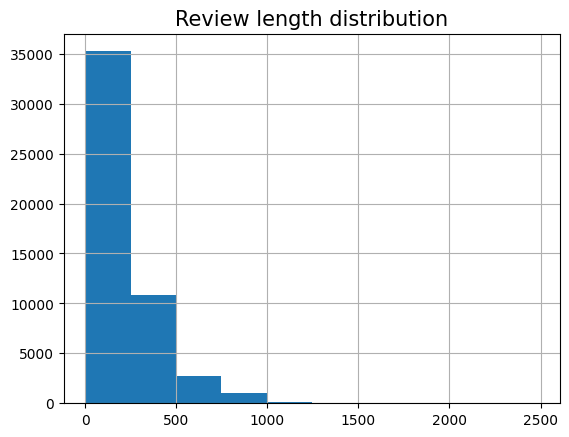

In [27]:
df["encoded_reviews"].apply(lambda x: len(x)).hist()
plt.title('Review length distribution', size=15)
plt.show()

***Inference***: We can see that majority of them are below 500. So we padded/truncated the reviews to 500 words.

In [28]:
seq_length = 200  # The length that the reviews will be padded/truncated to
features = Padding(df['encoded_reviews'], seq_length)


In [29]:
X_train, X_val, y_train, y_val = train_test_split(features, df['sentiment'].to_numpy(), test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print("Train set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Train set size: 30000
Validation set size: 10000
Test set size: 10000


I will be using PyTorch, it is essential to convert data into tensors and then into a DataLoaders, so the data can be effectively used in the training loop of neural network models.

In [30]:
from torch.utils.data import DataLoader, TensorDataset
# Convert data to PyTorch tensors and then to DataLoader
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
val_data = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
batch_size = 50

# To create iterable data loaders that allow batch processing of the data.
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(val_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

# RNN Model training and Evaluation 
(LSTM is type of RNN with three gates extra)

##### ***Reason for choosing Sequence Model like LSTN***
1. It Can handle sequential data effectively. (movie review is a sequential data)
2. Capture long-term dependencies within sentences.()
3. Learn complex relationships between words, leading to a more accurate understanding of sentiment.

In [31]:
class sentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """
    
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()
        
        self.output_size = output_size
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        # Embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        
        # Dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # Linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)
        
        #embedding and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        #stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # Dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        
        #sigmoid function
        sig_out = self.sigmoid(out)
        
        # reshape to be batch size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        return sig_out, hidden
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros((self.n_layers,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.n_layers,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden

In [32]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code. - 
# if is_cuda:
#     device = torch.device("cuda")
#     print("GPU is available")
# else:
#     device = torch.device("cpu")
#     print("GPU not available, CPU used")
device = torch.device("cpu") # I had some issues with my gpu so I will be using cpu
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int) + 1
output_size = 1
embedding_dim = 64
hidden_dim = 256
n_layers = 2

model = sentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
model = model.to(device)

print(model)

sentimentLSTM(
  (embedding): Embedding(181096, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [33]:
lr=0.001

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

clip = 5
epochs = 2
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()
    # initialize hidden state 
    h = model.init_hidden(batch_size)
    for inputs, labels in train_loader:
        
        inputs, labels = inputs.to(device), labels.to(device)   
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])
        
        model.zero_grad()
        output,h = model(inputs,h)
        
        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
 
    
        
    val_h = model.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model.eval()
    for inputs, labels in valid_loader:
        val_h = tuple([each.data for each in val_h])

        inputs, labels = inputs.to(device), labels.to(device)

        output, val_h = model(inputs, val_h)
        val_loss = criterion(output.squeeze(), labels.float())

        val_losses.append(val_loss.item())
            
        accuracy = acc(output,labels)
        val_acc += accuracy
            
    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model.state_dict(), 'state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')

Epoch 1
train_loss : 0.6892895873387654 val_loss : 0.6783326616883278
train_accuracy : 52.54666666666667 val_accuracy : 56.76
Validation loss decreased (inf --> 0.678333).  Saving model ...
Epoch 2
train_loss : 0.5850283624728521 val_loss : 0.4631504160165787
train_accuracy : 69.58 val_accuracy : 77.47
Validation loss decreased (0.678333 --> 0.463150).  Saving model ...


***Inference***:
1. **Training is progressing**: The training loss is decreasing across epochs, indicating that the model is learning.
2. **Validation loss is a good indicator**: The validation loss also decreases, suggesting that the model is generalizing well and not just overfitting to the training data.
3. **Accuracy is improving**: Both training and validation accuracy are increasing, further supporting the model's progress.

## Conclusion
    1. Logistic Regression and SGD classifier works well in traditional statiscal model without semantic information.
    2. LSTM model works generalise well by learning semantic information than traditional statiscal model but it's computational Intensive to train the model. 

##### Improvement:
We can use in multiple ways :
          1. Increasing the Epochs and adjusting some of the Hyperparameters like Regularization if model faces overfitting of the above LSTM.
          2. In my LSTM model, embeddings are learned during model training so If we use pre-trained embedding, model performance may be improved or try different Embedding Dimensionality.(128, 256, 512)
          3. Adavnce architecture like BERT , Roberta can be used to improve the performance on this challenge.


